Importing the libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab im
ort files
uploaded = files.upload()

Saving datasetProcessed.csv to datasetProcessed.csv


In [0]:
df= pd.read_csv("datasetProcessed.csv")

In [0]:
df.head()

,Date,CO,NO2,SO2,Ozone,PM10,PM2
0,02-01-15,0.3,0.0326,0.0048,0.028,0.014,0.0133
1,03-01-15,0.4,0.0336,0.0044,0.047,0.018,0.0200
2,04-01-15,0.4,0.0383,0.0030,0.053,0.018,0.0085
3,05-01-15,0.7,0.0429,0.0013,0.053,0.019,0.0068
4,06-01-15,0.2,0.0139,0.0003,0.037,0.010,0.0057


Taking the columns of our interest i.e Date & Ozone



In [0]:
timeSeriesdf= df[['Date','Ozone']]

In [0]:
timeSeriesdf.head()

,Date,Ozone
0,02-01-15,0.028
1,03-01-15,0.047
2,04-01-15,0.053
3,05-01-15,0.053
4,06-01-15,0.037


Converting the Data column into DataTime format

In [0]:
timeSeriesdf['Date']=pd.to_datetime(timeSeriesdf['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
timeSeriesdf.head()

,Date,Ozone
0,2015-02-01,0.028
1,2015-03-01,0.047
2,2015-04-01,0.053
3,2015-05-01,0.053
4,2015-06-01,0.037


Making the Date as index of the dataframe

In [0]:
timeSeriesdf.set_index('Date',inplace=True)

In [0]:
timeSeriesdf.head()

,Ozone
Date,
2015-02-01,0.028
2015-03-01,0.047
2015-04-01,0.053
2015-05-01,0.053
2015-06-01,0.037


Taking monthwise data of ozone

In [0]:
monthly = timeSeriesdf.resample('M').mean()

In [0]:
monthly.head()

,Ozone
Date,
2015-01-31,0.028636
2015-02-28,0.032120
2015-03-31,0.038931
2015-04-30,0.046300
2015-05-31,0.047724


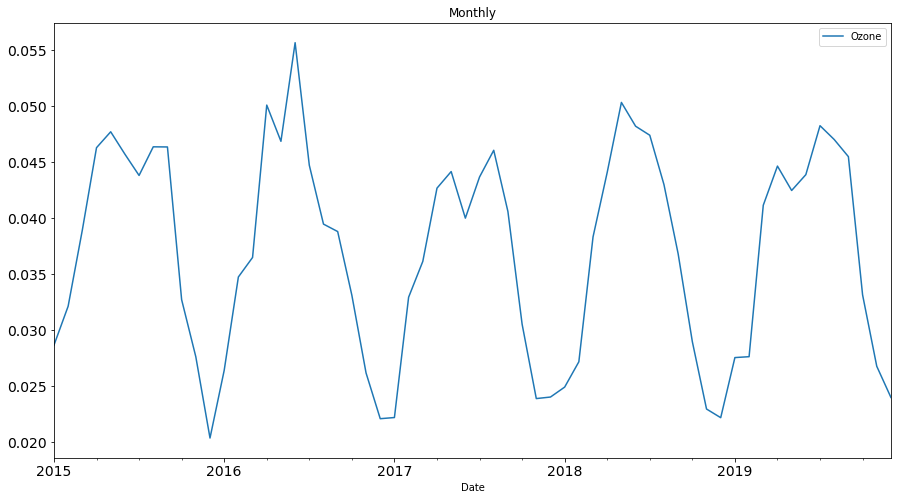

In [0]:
monthly.plot(figsize=(15,8), title= 'Monthly', fontsize=14)

Performing Dickey-Fuller Test

In [0]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [0]:
adfuller_test(monthly['Ozone'])

ADF Test Statistic : -7.43802946669761
p-value : 6.109647240281484e-11
#Lags Used : 5
Number of Observations Used : 54
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [0]:
rolmean = monthly.rolling(window=12).mean()
rolstd = monthly.rolling(window=12).std()


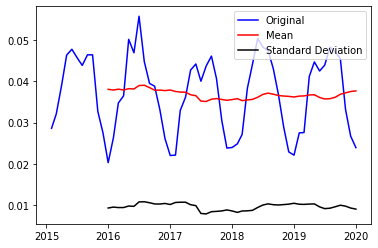

In [0]:
orig= plt.plot(monthly,color= 'blue', label= 'Original')
mean= plt.plot(rolmean,color= 'red', label= 'Mean')
std= plt.plot(rolstd,color= 'black', label= 'Standard Deviation')
plt.legend(loc='upper right')
plt.show(block=False)

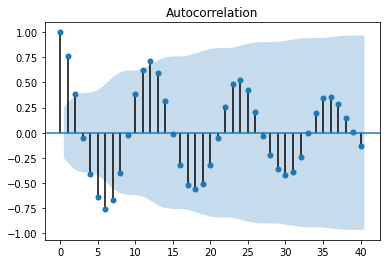

In [0]:
acf = plot_acf(monthly, lags=40)


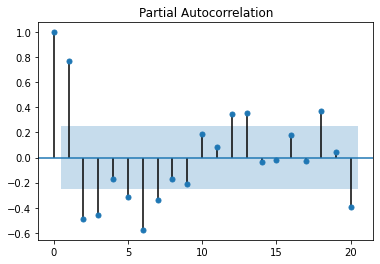

In [0]:
pacf = plot_pacf(monthly, lags=20)

In [0]:
#p= 4
#d= 0 
#q= 1

In [0]:
monthly = timeSeriesdf.resample('M').mean()

Prediction using SARIMA Model

In [0]:
model=sm.tsa.statespace.SARIMAX(monthly,order=(4, 0, 1),seasonal_order=(4,0,1,12))
results=model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Ozone   No. Observations:                   60
Model:             SARIMAX(4, 0, 1)x(4, 0, 1, 12)   Log Likelihood                 235.962
Date:                            Tue, 28 Apr 2020   AIC                           -449.923
Time:                                    01:37:45   BIC                           -426.886
Sample:                                01-31-2015   HQIC                          -440.912
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6975      0.965      0.723      0.470      -1.194       2.589
ar.L2          0.2039      0.583      0.350      0.727      -0.939       1.347
ar.L3         -0.0813      0.382     -0.213      0.832      -0.831       0.668
ar.L4          0.1608      0.214      0.752      0.452      -0.258       0.580
ma.L1         -0.1193      1.026     -0.116      0.907      -2.129       1.891
ar.S.L12      -0.1312      9.764     -0.013      0.989     -19.269      19.006
ar.S.L24       0.2790      2.494      0.112      0.911      -4.609       5.167
ar.S.L36       0.2755      3.596      0.077      0.939      -6.774       7.324
ar.S.L48       0.5028      2.902      0.173      0.862      -5.185       6.191
ma.S.L12       0.3294     12.835      0.026      0.980     -24.826      25.485
sigma2      1.243e-05   2.42e-05      0.513      0.608   -3.51e-05    5.99e-05
===================================================================================
Ljung-Box (Q):                       43.52   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.32   Prob(JB):                         0.58
Heteroskedasticity (H):               0.64   Skew:                            -0.05
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'RSS: 0.0022')

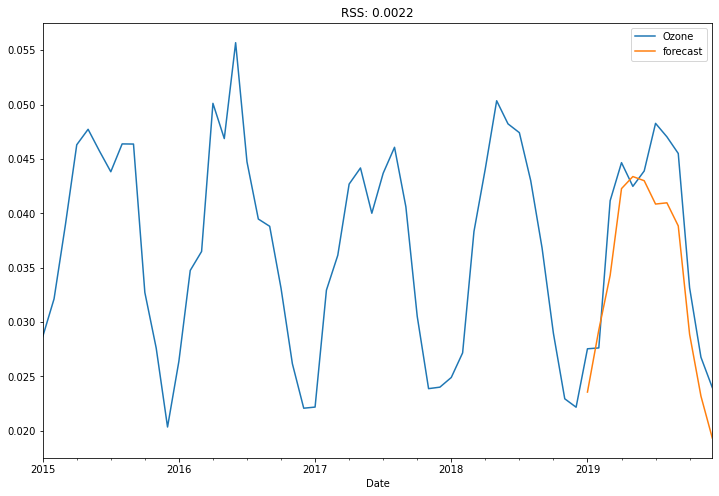

In [0]:
monthly['forecast']=results.predict(start=48,end=60,dynamic=True)
monthly[['Ozone','forecast']].plot(figsize=(12,8))
plt.title('RSS: %.4f'% sum((results.fittedvalues-monthly['Ozone'])**2))

Creating a column with future dates

In [0]:
future_dates=[monthly.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [0]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=monthly.columns)

In [0]:
future_datest_df.head()

,Ozone,forecast
2020-01-31,NaN,NaN
2020-02-29,NaN,NaN
2020-03-31,NaN,NaN
2020-04-30,NaN,NaN
2020-05-31,NaN,NaN


In [0]:
future_df=pd.concat([monthly,future_datest_df])

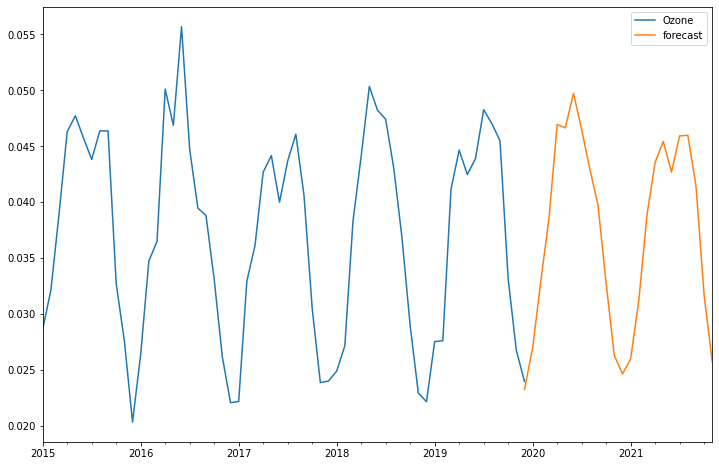

In [0]:
future_df['forecast'] = results.predict(start = 59, end = 84, dynamic= True)  
future_df[['Ozone', 'forecast']].plot(figsize=(12, 8))

In [0]:
future_df.tail(23)

,Ozone,forecast
2020-01-31,NaN,0.026980
2020-02-29,NaN,0.032955
2020-03-31,NaN,0.038549
2020-04-30,NaN,0.046943
2020-05-31,NaN,0.046648
2020-06-30,NaN,0.049735
2020-07-31,NaN,0.046486
2020-08-31,NaN,0.042967
2020-09-30,NaN,0.039744
2020-10-31,NaN,0.032745
